# Recommendation System Case Study

**Objective:**

The purpose of this case study is to build a recommendation system to recommend products to customers based on the their previous ratings for other products.

**Domain:** E-commerce

**Dataset Attributes:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( Column Ignored)


##  #1  Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

import time
import json
import math


##  #2  Loading and understanding the dataset

In [5]:
data =  pd.read_csv(r'C:\Users\akjaiswal\Desktop\ML\Projects\08. Amazon Recommendation System\ratings_Electronics.csv')

In [6]:
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


We need to append column names in the dataset.

In [7]:
columns=['userId', 'productId', 'ratings','timestamp']

data = pd.read_csv(r'C:\Users\akjaiswal\Desktop\ML\Projects\08. Amazon Recommendation System\ratings_Electronics.csv', names = columns)

In [8]:
data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


**Dropping the timestamp column**

In [9]:
data.drop('timestamp', axis = 1, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [12]:
data.shape

(7824482, 3)

In [13]:
data.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [15]:
data.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [16]:
data.isna().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


### **Observations** :

**The dataset is huge with 7824482 rows and 3 columns**

**The dataset does not have any "NA" or "NULL" values**

**From 5-Point Summary we can observe that the ratings are skewed to right**

In [22]:
# No of users provided min rating

print('User who provided max number of rating')
data['userId'][data.ratings == data['ratings'].min()].count()

User who provided max number of rating


901765

In [25]:
# No of users provided max rating

print('User who provided max number of rating')
data['userId'][data.ratings == data['ratings'].max()].count()

User who provided max number of rating


4347541

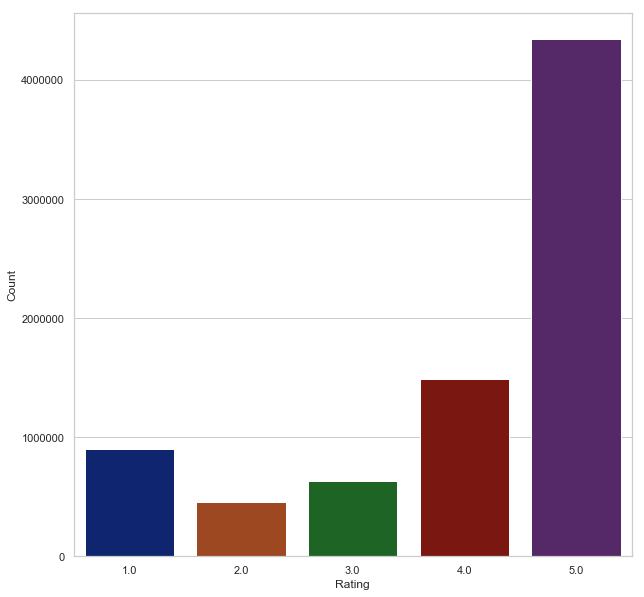

In [36]:
# Checking the distribution of ratings 


sns.set(rc={'figure.figsize': (10, 10)})
sns.set_style('whitegrid')
ax = sns.countplot(x='ratings', data=data, palette=sns.color_palette('dark'))
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

**It look like majarity of the rating are given 5.0 followed by 4.0 and rest**

**The min rating count given for 2.0**

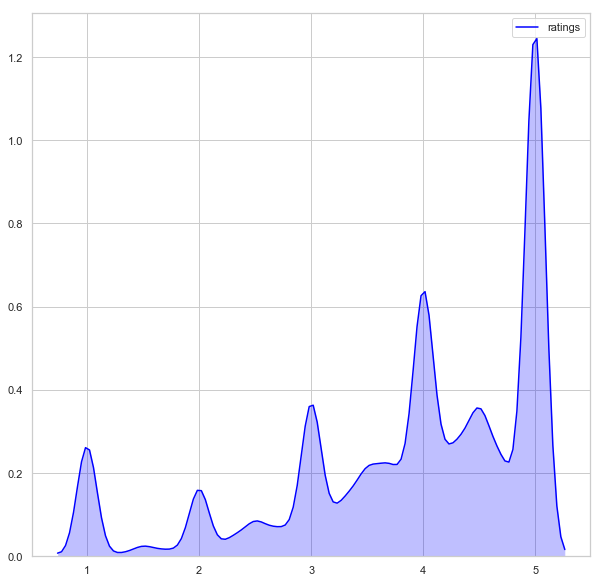

In [35]:
ax = sns.kdeplot(data.groupby('productId')['ratings'].mean(), shade=True, color='blue')
plt.show()

**We can notice a large spike in the mean rating at value 5. This is a valuable indicator that points to the skewness of the data.**

In [37]:
popular_products = pd.DataFrame(data.groupby('productId')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(5)

,ratings
productId,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226


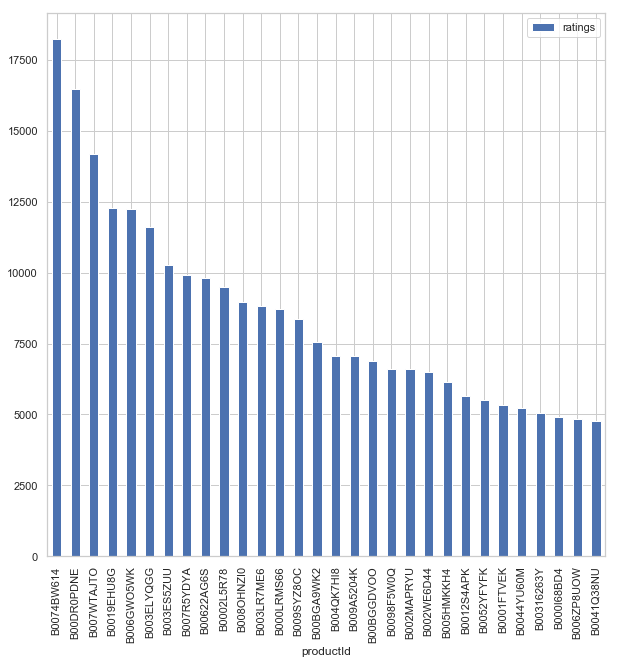

In [40]:
most_popular.head(30).plot(kind = "bar")

**The above graph gives us the most popular products (arranged in descending order) sold by the business.**

**# B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000 etc**

## #3    Subsetting the Dataset

In [63]:
#Taking subset of the dataset

data_sub=data.iloc[:50000,0:]

In [64]:
#Check the top 10 users based on ratings

most_rated=data_sub.groupby('userId').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 userId
A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
A1RPTVW5VEOSI     17
A1ISUNUWG0K02V    16
A1MJMYLRTZ76ZX    16
A23ZO1BVFFLGHO    15
A7Y6AVS576M03     15
dtype: int64


In [65]:
counts=data_sub.userId.value_counts()
data_final=data_sub[data_sub.userId.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(data_final))
print('Number of unique users in the final data = ', data_final['userId'].nunique())
print('Number of unique products in the final data = ', data_final['userId'].nunique())

Number of users who have rated 25 or more items = 219
Number of unique users in the final data =  11
Number of unique products in the final data =  11


In [66]:
#constructing the pivot table
final_ratings_matrix = data_final.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
final_ratings_matrix.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


In [68]:
final_ratings_matrix.shape

(11, 186)

In [69]:
#Calucating the density of the rating marix

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  219
possible_num_of_ratings =  2046
density: 10.70%


**The density value of the matrix also shows that it is a sparse matrix.**

##  #4  Splitting the Dataset

In [73]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_final,test_size = 0.30, random_state=0, shuffle=False)

In [74]:
train_data.head()

,userId,productId,ratings
3050,ALUNVOQRXOZIA,1400599997,1.0
8100,AY8Q1X7G96HV5,B00000DM9M,5.0
8979,A1RPTVW5VEOSI,B00000J061,5.0
9098,AY8Q1X7G96HV5,B00000J08C,5.0
9220,ALUNVOQRXOZIA,B00000J0A2,4.0


In [75]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (153, 3)
Shape of testing data:  (66, 3)


## #5. Building Popularity Recommder model


In [76]:
#Count of user_id for each unique product as recommendation score 

train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head(10)

,productId,score
0,1400599997,1
1,B00000DM9M,1
2,B00000J061,1
3,B00000J08C,1
4,B00000J0A2,1
5,B00000J0E8,1
6,B00000J1QZ,1
7,B00000J1US,1
8,B00000J3H5,1
9,B00000J3HB,1


In [77]:
train_data_grouped.tail(10)

,productId,score
119,B00004RFC5,1
120,B00004RFC6,1
121,B00004RG6G,1
122,B00004RG7J,1
123,B00004RG7N,1
124,B00004RG85,1
125,B00004RGIG,1
126,B00004RIPE,1
127,B00004RIUJ,2
128,B00004RJYB,1


In [78]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,productId,score,rank
111,B00004RC2D,5,1.0
75,B00002SWHH,3,2.0
10,B00000J3II,2,3.0
16,B00000J47A,2,4.0
21,B00000J570,2,5.0


In [79]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [80]:
find_recom = [11,110,250]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId: 11

     userId   productId  score  rank
111      11  B00004RC2D      5   1.0
75       11  B00002SWHH      3   2.0
10       11  B00000J3II      2   3.0
16       11  B00000J47A      2   4.0
21       11  B00000J570      2   5.0


The list of recommendations for the userId: 110

     userId   productId  score  rank
111     110  B00004RC2D      5   1.0
75      110  B00002SWHH      3   2.0
10      110  B00000J3II      2   3.0
16      110  B00000J47A      2   4.0
21      110  B00000J570      2   5.0


The list of recommendations for the userId: 250

     userId   productId  score  rank
111     250  B00004RC2D      5   1.0
75      250  B00002SWHH      3   2.0
10      250  B00000J3II      2   3.0
16      250  B00000J47A      2   4.0
21      250  B00000J570      2   5.0




**The system will recommend same products to users as it is based on popularity**

**One of the disadvantage is it is a non-personalized recommendation system**

## #6. Building Collaborative Filtering recommender model.


In [81]:
data_CF = pd.concat([train_data, test_data]).reset_index()
data_CF.head()

,index,userId,productId,ratings
0,3050,ALUNVOQRXOZIA,1400599997,1.0
1,8100,AY8Q1X7G96HV5,B00000DM9M,5.0
2,8979,A1RPTVW5VEOSI,B00000J061,5.0
3,9098,AY8Q1X7G96HV5,B00000J08C,5.0
4,9220,ALUNVOQRXOZIA,B00000J0A2,4.0


### User Based Collaborative Filtering model

In [83]:
# Matrix with row per 'user' and column per 'item' 

pivot_df = data_CF.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


In [85]:
#define user index from 0 to 10

pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.set_index(['user_index'], inplace=True)
pivot_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


### Singular Value Decomposition

In [87]:
from scipy.sparse.linalg import svds

In [88]:
# Singular Value Decomposition

U, sigma, Vt = svds(pivot_df, k = 10)

In [89]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[ 2.65871898e-01  8.28788249e-01  1.14160900e-01 -2.15685919e-01
  -2.65928896e-04 -4.93636653e-02  1.66297884e-01 -3.12732051e-01
  -1.53122256e-01  1.38465143e-01]
 [ 5.53711304e-02  1.21204397e-01 -8.17836609e-02  3.29682359e-01
  -1.47955175e-01 -8.18019500e-01 -2.13209931e-01  2.76257471e-01
  -2.09061119e-01  1.01498819e-01]
 [ 5.46679471e-01 -1.37512688e-01  2.79596983e-02  1.45212122e-01
  -3.57798248e-02  1.89642626e-01 -6.60636300e-01 -2.07100247e-01
   3.59790632e-02  1.23044532e-01]
 [ 4.63168744e-02  5.39880164e-02 -8.32935752e-01  1.36292972e-01
   1.12974956e-02  9.74799278e-02 -5.43326589e-02 -2.99913518e-01
  -1.00398248e-01  1.16155900e-01]
 [-4.82857184e-02 -5.06969281e-03  6.10478781e-02  7.63553438e-02
   8.79528911e-02  1.33412578e-01  9.24837886e-02  2.48586367e-01
   1.79064339e-01  9.26201600e-01]
 [-1.33072419e-01 -3.30520700e-01 -8.58433108e-03 -6.82184355e-01
  -3.10981905e-02 -4.06414738e-01 -1.22417282e-01 -4.14339191e-01
   4.0445

In [90]:
print('Sigma: \n',sigma)

Sigma: 
 [15.65710264 16.05091576 17.43121071 17.74252629 18.18622003 18.83061496
 19.14527912 19.94315139 22.99328895 28.83750492]


In [91]:
# Construct diagonal array in SVD

sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[15.65710264  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         16.05091576  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         17.43121071  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         17.74252629  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         18.18622003  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         18.83061496
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  19.14527912  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         19.94315139  0.          0.        ]
 [ 0.          0.          0.        

In [92]:
#Predicted ratings

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
0,-0.005077,-0.010023,0.219864,-0.010023,-0.020310,-0.006562,2.962929,0.026594,4.938216,4.938216,...,-0.025387,0.026594,0.026594,0.219864,0.021275,-0.008018,-0.006014,-0.008018,0.026594,-0.008018
1,-0.000261,-0.000515,0.011300,-0.000515,-0.001044,-0.000337,-0.001905,0.001367,-0.003176,-0.003176,...,-0.001305,0.001367,0.001367,0.011300,0.001093,-0.000412,-0.000309,-0.000412,0.001367,-0.000412
2,-0.016300,-0.032177,0.705839,-0.032177,-0.065201,-0.021066,-0.119009,0.085374,-0.198349,-0.198349,...,-0.081502,0.085374,0.085374,0.705839,0.068299,-0.025742,-0.019306,-0.025742,0.085374,-0.025742
3,0.018068,0.035667,4.217599,0.035667,0.072274,0.023351,0.131918,-0.094635,0.219864,0.219864,...,0.090342,-0.094635,-0.094635,4.217599,-0.075708,0.028534,0.021400,0.028534,-0.094635,0.028534
4,0.002185,0.004314,-0.094635,0.004314,0.008742,0.002824,0.015956,4.988553,0.026594,0.026594,...,0.010927,4.988553,4.988553,-0.094635,3.990843,0.003451,0.002588,0.003451,4.988553,0.003451


In [95]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    
    # index starts at 0  
    user_idx = userID-1 
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [96]:
userID = 8
num_recommendations = 4
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
B00000J061                  0.0          1.526746
B00003WGP5                  0.0          1.526746
B00004TH2W                  0.0          1.526746
B00004RERZ                  0.0          1.526746


In [98]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B00001P4XA                  0.0          1.526746
B00000JYLO                  0.0          1.526746
B00004T1WX                  0.0          1.526746
B00004T1WZ                  0.0          1.526746
B00000J4ER                  0.0          1.526746


**Since, it is a Collaborative recommender model, so, all the users are given different recommendations based on users past behaviour.**

## #7. Evaluation of Collabrative recommendation model


In [100]:
# Actual ratings given by the users

final_ratings_matrix.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


In [101]:
# Average ACTUAL rating for each item

final_ratings_matrix.mean().head()

productId
1400599997    0.090909
B00000DM9M    0.454545
B00000J061    0.454545
B00000J08C    0.454545
B00000J0A2    0.363636
dtype: float64

In [103]:
# Predicted ratings 

preds_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
0,-0.005077,-0.010023,0.219864,-0.010023,-0.020310,-0.006562,2.962929,0.026594,4.938216,4.938216,...,-0.025387,0.026594,0.026594,0.219864,0.021275,-0.008018,-0.006014,-0.008018,0.026594,-0.008018
1,-0.000261,-0.000515,0.011300,-0.000515,-0.001044,-0.000337,-0.001905,0.001367,-0.003176,-0.003176,...,-0.001305,0.001367,0.001367,0.011300,0.001093,-0.000412,-0.000309,-0.000412,0.001367,-0.000412
2,-0.016300,-0.032177,0.705839,-0.032177,-0.065201,-0.021066,-0.119009,0.085374,-0.198349,-0.198349,...,-0.081502,0.085374,0.085374,0.705839,0.068299,-0.025742,-0.019306,-0.025742,0.085374,-0.025742
3,0.018068,0.035667,4.217599,0.035667,0.072274,0.023351,0.131918,-0.094635,0.219864,0.219864,...,0.090342,-0.094635,-0.094635,4.217599,-0.075708,0.028534,0.021400,0.028534,-0.094635,0.028534
4,0.002185,0.004314,-0.094635,0.004314,0.008742,0.002824,0.015956,4.988553,0.026594,0.026594,...,0.010927,4.988553,4.988553,-0.094635,3.990843,0.003451,0.002588,0.003451,4.988553,0.003451


In [104]:
# Average PREDICTED rating for each item

preds_df.mean().head()

productId
1400599997    0.088513
B00000DM9M    0.449816
B00000J061    0.558292
B00000J08C    0.449816
B00000J0A2    0.354053
dtype: float64

In [105]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(186, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
1400599997,0.090909,0.088513,0
B00000DM9M,0.454545,0.449816,1
B00000J061,0.454545,0.558292,2
B00000J08C,0.454545,0.449816,3
B00000J0A2,0.363636,0.354053,4


In [106]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.05854 



## #8. Getting top - K ( K = 5) recommendations.


In [113]:
# Enter 'userID' and 'num_recommendations' for the user #

userID = 11
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 11):

                   user_ratings  user_predictions
Recommended Items                                
B00003WGP5                  0.0          0.035667
B00004TH2W                  0.0          0.035667
B00004RERZ                  0.0          0.035667
B00004RIPE                  0.0          0.035667
B00004S9WQ                  0.0          0.035667


## #9.Summarising insights.

    - **The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user.The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.**

    - **Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.**